<a href="https://colab.research.google.com/github/andrewsundberg/DS301/blob/master/Lab8_DNN_Classifier_FashionMNIST_SundbergAndrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import matplotlib.pyplot as plt
import keras

%matplotlib inline

In [0]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [0]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [0]:
class_names[y_train[0]]

'Ankle boot'

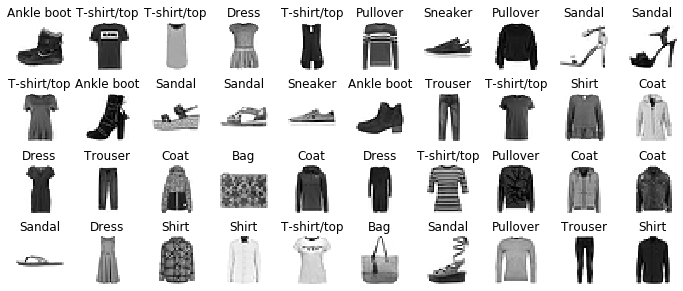

In [0]:


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dense(400, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [0]:
model.layers

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_5 (Dense)              (None, 300)               120300    
_________________________________________________________________
dense_6 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

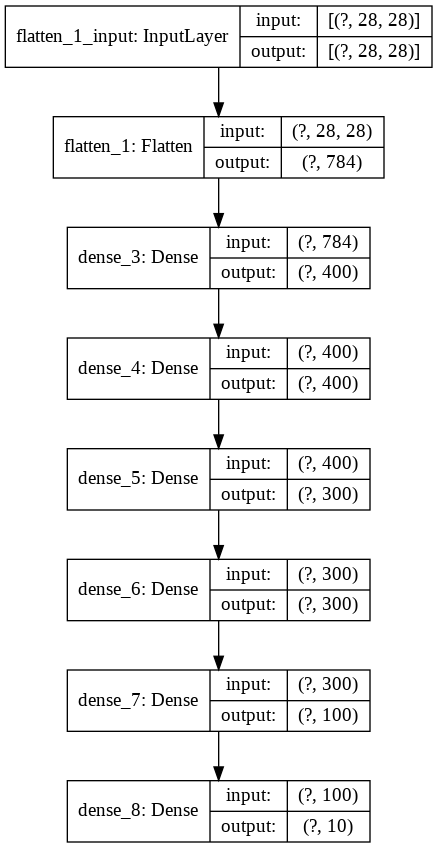

In [0]:
tf.keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [0]:
model.fit(X_train, y_train, epochs=7)

model.evaluate(X_test, y_test)

Train on 60000 samples
Epoch 1/7
60000/60000 [==============================] - 6s 107us/sample - loss: 0.7341 - accuracy: 0.7518
Epoch 2/7
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4606 - accuracy: 0.8350
Epoch 3/7
60000/60000 [==============================] - 6s 102us/sample - loss: 0.4054 - accuracy: 0.8556
Epoch 4/7
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3717 - accuracy: 0.8663
Epoch 5/7
60000/60000 [==============================] - 7s 110us/sample - loss: 0.3488 - accuracy: 0.8717
Epoch 6/7
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3295 - accuracy: 0.8787
Epoch 7/7
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3136 - accuracy: 0.8840
10000/1 [===========================================================================================================================================================================================================================

[0.35443597029447554, 0.87]